In [1]:
import sys
assert sys.version_info >= (3, 5)

In [2]:
import sklearn
assert sklearn.__version__ >= "0.2"

In [3]:
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

In [4]:
import numpy as np
import os

np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = 'Chapter 11'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Vanishing/ Exploding Gradients Problem

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z))

Saving figure sigmoid_saturation_plot


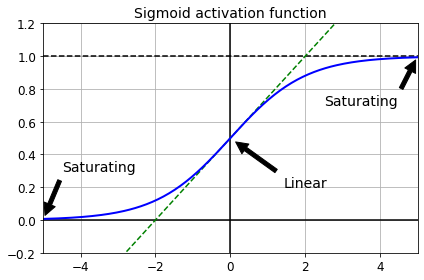

In [6]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), 'b-', linewidth=2)

props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating',
            xytext=(3.5, 0.7),
            xy=(5, 1),
            arrowprops=props,
            fontsize=14,
            ha='center')
plt.annotate('Saturating',
            xytext=(-3.5, 0.3),
            xy=(-5, 0),
            arrowprops=props,
            fontsize=14,
            ha='center')
plt.annotate('Linear',
            xytext=(2, 0.2),
            xy=(0, 0.5),
            arrowprops=props,
            fontsize=14,
            ha='center')
plt.grid(True)
plt.title('Sigmoid activation function', fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig('sigmoid_saturation_plot')
plt.show()

## Xavier and He Initialization

In [7]:
[name for name  in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [8]:
keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

In [9]:
init = keras.initializers.VarianceScaling(scale=2, mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation='relu', kernel_initializer=init)

## Nonsaturating Activation Functions

### Leaky ReLU

In [10]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

Saving figure leaky_relu_plot


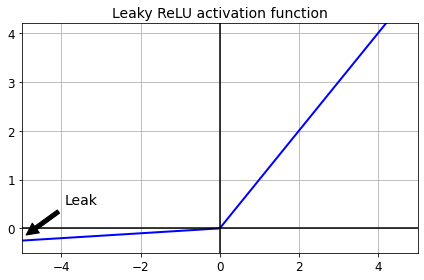

In [11]:
plt.plot(z, leaky_relu(z, 0.05), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak',
            xytext=(-3.5, 0.5),
            xy=(-5, -0.2),
            arrowprops=props,
            fontsize=14,
            ha='center')
plt.title('Leaky ReLU activation function', fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig('leaky_relu_plot')
plt.show()

In [12]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [13]:
[m for m in dir(keras.layers) if 'relu' in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [14]:
# LeakyReLU를 사용한 패션 MNIST 신경망 훈련
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
tf.random.set_seed(42)
np.random.seed(42)

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 2s 944us/step - loss: 0.7955 - accuracy: 0.7361 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7898
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5832 - accuracy: 0.8075 - val_loss: 0.5582 - val_accuracy: 0.8202
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5338 - accuracy: 0.8225 - val_loss: 0.5157 - val_accurac

### PReLU

In [19]:
tf.random.set_seed(42)
np.random.seed(42)

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation='softmax')
])

In [21]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8197 - accuracy: 0.7356 - val_loss: 0.7305 - val_accuracy: 0.7630
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6966 - accuracy: 0.7693 - val_loss: 0.6565 - val_accuracy: 0.7880
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6331 - accuracy: 0.7909 - val_loss: 0.6004 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5917 - accuracy: 0.8057 - val_loss: 0.5656 - val_accuracy: 0.8178
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5619 - accuracy: 0.8135 - val_loss: 0.5406 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5390 - accuracy: 0.8206 - val_loss: 0.5196 - val_accuracy:

### ELU

In [23]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

Saving figure elu_plot


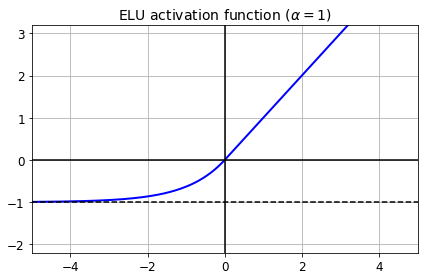

In [24]:
plt.plot(z, elu(z), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r'ELU activation function ($\alpha=1$)', fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig('elu_plot')
plt.show()

In [25]:
# 층을 만들 때 activation 으로 지정 가능.
keras.layers.Dense(10, activation='elu')

### SELU
- [great paper](https://arxiv.org/pdf/1706.02515.pdf) by Günter Klambauer

In [26]:
from scipy.special import erfc

# alpha와 scale은 평균 0과 표준 편차 1로 자기 정규화함
# Equation 14 in the paper
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [27]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

Saving figure selu_plot


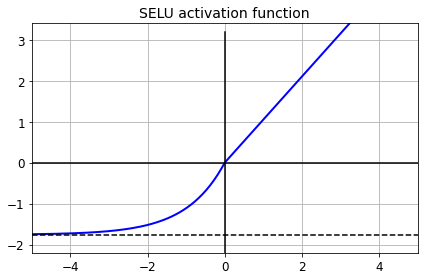

In [28]:
plt.plot(z, selu(z), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title('SELU activation function', fontsize=14)
plt.axis([-5, 5, -2.2, 3.4])

save_fig('selu_plot')
plt.show()

In [29]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # 압력 특성은 반드시 표준화되어야 함. N(0, 1)
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun 초기화
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print(f"Layer {layer}: mean {means:.2f}, std deviation {stds:.2f}")

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [30]:
keras.layers.Dense(10, activation='selu', kernel_initializer='lecun_normal') # lecun_normal로 초기화

In [31]:
# 100개의 은닉층과 SELU 활성화 함수를 사용한 패션 MNIST를 위한 신경망
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'))

for layer in range(99):
    model.add(keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))

model.add(keras.layers.Dense(10, activation='softmax'))

In [33]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=['accuracy'])

In [34]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [35]:
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 17s 10ms/step - loss: 1.4263 - accuracy: 0.4540 - val_loss: 0.9458 - val_accuracy: 0.6566
Epoch 2/5
1719/1719 [==============================] - 17s 10ms/step - loss: 0.8757 - accuracy: 0.6783 - val_loss: 0.7085 - val_accuracy: 0.7458
Epoch 3/5
1719/1719 [==============================] - 25s 15ms/step - loss: 0.7161 - accuracy: 0.7425 - val_loss: 0.6792 - val_accuracy: 0.7300
Epoch 4/5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.6343 - accuracy: 0.7729 - val_loss: 0.6054 - val_accuracy: 0.7802
Epoch 5/5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.6750 - accuracy: 0.7567 - val_loss: 0.7453 - val_accuracy: 0.7470


In [36]:
# 대신 ReLU 함수 사용할 경우
tf.random.set_seed(42)
np.random.seed(42)

In [37]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'))

for layer in range(99):
    model.add(keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'))

model.add(keras.layers.Dense(10, activation='softmax'))

In [38]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=['accuracy'])

In [39]:
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 24s 14ms/step - loss: 1.7924 - accuracy: 0.2722 - val_loss: 1.2233 - val_accuracy: 0.4512
Epoch 2/5
1719/1719 [==============================] - 22s 13ms/step - loss: 1.1371 - accuracy: 0.5168 - val_loss: 1.2614 - val_accuracy: 0.4846
Epoch 3/5
1719/1719 [==============================] - 22s 13ms/step - loss: 0.9641 - accuracy: 0.6094 - val_loss: 0.9644 - val_accuracy: 0.5936
Epoch 4/5
1719/1719 [==============================] - 23s 13ms/step - loss: 0.8781 - accuracy: 0.6535 - val_loss: 0.8568 - val_accuracy: 0.6688
Epoch 5/5
1719/1719 [==============================] - 22s 13ms/step - loss: 0.8199 - accuracy: 0.6726 - val_loss: 0.7476 - val_accuracy: 0.7058


생각보다 좋지않다 => 기울기 폭주/소실 문제 발생 가능성

## Batch Normalization

In [40]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_212 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_213 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_214 (Dense)            (None, 10)               

In [42]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [43]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=['accuracy'])

In [44]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8750 - accuracy: 0.7124 - val_loss: 0.5525 - val_accuracy: 0.8230
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5753 - accuracy: 0.8029 - val_loss: 0.4724 - val_accuracy: 0.8472
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5189 - accuracy: 0.8204 - val_loss: 0.4376 - val_accuracy: 0.8546
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4827 - accuracy: 0.8321 - val_loss: 0.4152 - val_accuracy: 0.8600
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4565 - accuracy: 0.8407 - val_loss: 0.3997 - val_accuracy: 0.8642
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4398 - accuracy: 0.8471 - val_loss: 0.3866 - val_accuracy: 0.8696
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4242 - accuracy: 0.8511 - val_loss: 0.3762 - val_accuracy:

활성화 함수전에 BN을 적용해도 잘 동작합니다(여기에는 논란의 여지가 있음) 
```BatchNormalization``` 층 이전의 층은 bias가 필요 없음  
```BatchNormalization``` 층이 무효화시키기 때문  
=> ```use_bias=False``` 사용

In [45]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [46]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=['accuracy'])

In [47]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0317 - accuracy: 0.6757 - val_loss: 0.6767 - val_accuracy: 0.7816
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6790 - accuracy: 0.7793 - val_loss: 0.5566 - val_accuracy: 0.8182
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5960 - accuracy: 0.8037 - val_loss: 0.5007 - val_accuracy: 0.8362
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5447 - accuracy: 0.8192 - val_loss: 0.4666 - val_accuracy: 0.8448
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5109 - accuracy: 0.8281 - val_loss: 0.4434 - val_accuracy: 0.8538
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4898 - accuracy: 0.8337 - val_loss: 0.4263 - val_accuracy: 0.8548
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4712 - accuracy: 0.8397 - val_loss: 0.4131 - val_accuracy:

## Gradient Clipping
- All keras optimizers accept ```clipnorm``` or ```clipvalue``` arguments

In [48]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [49]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

# Reusing Pretrained Layers

## Reusing a Keras model
fashion MNIST train set을 2개로 구분  
- ```X_train_A``` : all images of all items except for sandals and shirts (classes 5 and 6).
- ```X_train_B``` : a much smaller training set of just the first 200 images of sandals or shirts.


validation set과 test set도 이렇게 구분

A 세트에서 model train하고, 이를 reuse하여 B 세트를 해결해보는 방식

In [50]:
def split_dataset(X, y):
    y_5_or_y_6 = (y==5) | (y==6)
    y_A = y[~y_5_or_y_6]
    y_A[y_A > 6] -= 2 # Class 7, 8, 9를 5, 6, 7로 변경
    y_B = (y[y_5_or_y_6]==6).astype(np.float32)
    return ((X[~y_5_or_y_6], y_A), (X[y_5_or_y_6], y_B))

In [51]:
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [52]:
X_train_A.shape, X_train_B.shape

((43986, 28, 28), (200, 28, 28))

In [53]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [54]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [55]:
tf.random.set_seed(42)
np.random.seed(42)

In [56]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation='selu'))
model_A.add(keras.layers.Dense(8, activation='softmax'))

In [57]:
model_A.compile(loss='sparse_categorical_crossentropy',
               optimizer=keras.optimizers.SGD(learning_rate=1e-3),
               metrics=['accuracy'])

In [58]:
history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.5926 - accuracy: 0.8104 - val_loss: 0.3896 - val_accuracy: 0.8662
Epoch 2/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3523 - accuracy: 0.8785 - val_loss: 0.3288 - val_accuracy: 0.8824
Epoch 3/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3171 - accuracy: 0.8896 - val_loss: 0.3014 - val_accuracy: 0.8984
Epoch 4/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2973 - accuracy: 0.8975 - val_loss: 0.2896 - val_accuracy: 0.9018
Epoch 5/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9019 - val_loss: 0.2775 - val_accuracy: 0.9066
Epoch 6/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9061 - val_loss: 0.2735 - val_accuracy: 0.9066
Epoch 7/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2642 - accuracy: 0.9092 - val_loss: 0.2719 - val_accuracy:

In [59]:
model_A.save('my_model_A.h5')

In [60]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100 ,50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation='selu'))
model_B.add(keras.layers.Dense(1, activation='sigmoid'))

In [61]:
model_B.compile(loss='binary_crossentropy',
               optimizer=keras.optimizers.SGD(learning_rate=1e-3),
               metrics=['accuracy'])

In [62]:
history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 35ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 10ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 11ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 11ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 12ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 13ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 13ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [63]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_224 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_225 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_226 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_227 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_228 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_229 (Dense)            (None, 1)                

In [64]:
model_A = keras.models.load_model('my_model_A.h5')
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

```model_B_on_A```와 ```model_A```는 층을 공유하기 때문에 하나를 훈련하면 두 모델 모두 업데이트 됨.  
이를 피하려면 ```model_A```를 클로한 것을 사용해 ```model_B_on_A```를 만들면 됨.

In [65]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

In [66]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
    
model_B_on_A.compile(loss='binary_crossentropy',
                    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                    metrics=['accuracy'])

In [67]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss='binary_crossentropy',
                    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                    metrics=['accuracy'])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 36ms/step - loss: 0.2626 - accuracy: 0.9400 - val_loss: 0.2773 - val_accuracy: 0.9290
Epoch 2/4
7/7 [==============================] - 0s 8ms/step - loss: 0.2530 - accuracy: 0.9400 - val_loss: 0.2678 - val_accuracy: 0.9310
Epoch 3/4
7/7 [==============================] - 0s 9ms/step - loss: 0.2438 - accuracy: 0.9400 - val_loss: 0.2592 - val_accuracy: 0.9351
Epoch 4/4
7/7 [==============================] - 0s 8ms/step - loss: 0.2354 - accuracy: 0.9400 - val_loss: 0.2512 - val_accuracy: 0.9371
Epoch 1/16
7/7 [==============================] - 0s 33ms/step - loss: 0.2109 - accuracy: 0.9450 - val_loss: 0.2037 - val_accuracy: 0.9635
Epoch 2/16
7/7 [==============================] - 0s 8ms/step - loss: 0.1689 - accuracy: 0.9550 - val_loss: 0.1716 - val_accuracy: 0.9726
Epoch 3/16
7/7 [==============================] - 0s 9ms/step - loss: 0.1403 - accuracy: 0.9650 - val_loss: 0.1491 - val_accuracy: 0.9807
Epoch 4/16
7/7 [====================

In [68]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [69]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.9940


[0.05631537362933159, 0.9940000176429749]

In [70]:
# 오차율이 4.9배나 줄은 것을 확인할 수 있음
(100 - 97.05) / (100 - 99.4)

4.916666666666718

# Faster Optimizers

## Momentum Optimization

In [71]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

## Nesterov Accelerated Gradient

In [72]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

## AdaGrad

In [73]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

## RMSProp

In [74]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

## Adam Optimization

In [75]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Nadam Optimization

In [76]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Learning Rate Scheduling

### Power Scheduling

``` lr = lr0 / (1 + steps / s)**c```
- keras uses ```c=1``` and ```s = 1 / decay```

In [77]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [78]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

In [79]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

In [80]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4898 - accuracy: 0.8266 - val_loss: 0.4066 - val_accuracy: 0.8600
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3793 - accuracy: 0.8651 - val_loss: 0.3733 - val_accuracy: 0.8708
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3468 - accuracy: 0.8772 - val_loss: 0.3747 - val_accuracy: 0.8714
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3260 - accuracy: 0.8846 - val_loss: 0.3512 - val_accuracy: 0.8794
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3108 - accuracy: 0.8896 - val_loss: 0.3448 - val_accuracy: 0.8784
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2973 - accuracy: 0.8942 - val_loss: 0.3416 - val_accuracy: 0.8838
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2871 - accuracy: 0.8979 - val_loss: 0.3376 - val_accuracy:

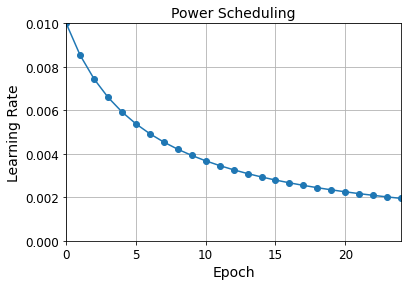

In [81]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs, "o-")
plt.axis([0, n_epochs-1, 0, 0.01])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Power Scheduling', fontsize=14)
plt.grid(True)
plt.show()

### Exponential Scheduling

```lr = lr0 * 0.1**(epoch / s)```

In [82]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [83]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [84]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

In [85]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])

In [86]:
n_epochs = 25
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8555 - accuracy: 0.7528 - val_loss: 1.2507 - val_accuracy: 0.6938
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7485 - accuracy: 0.7770 - val_loss: 0.6356 - val_accuracy: 0.8310
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6387 - accuracy: 0.8052 - val_loss: 1.0875 - val_accuracy: 0.7274
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5620 - accuracy: 0.8247 - val_loss: 0.5650 - val_accuracy: 0.8462
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4884 - accuracy: 0.8484 - val_loss: 0.5095 - val_accuracy: 0.8622
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4490 - accuracy: 0.8570 - val_loss: 0.5300 - val_accuracy: 0.8658
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4161 - accuracy: 0.8682 - val_loss: 0.4881 - val_accuracy:

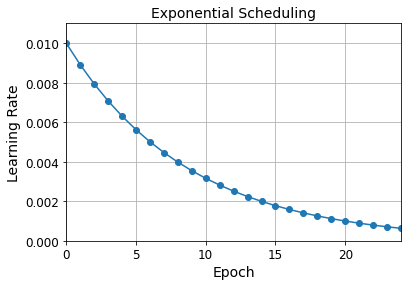

In [87]:
plt.plot(history.epoch, history.history['lr'], 'o-')
plt.axis([0, n_epochs-1, 0, 0.011])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Exponential Scheduling', fontsize=14)
plt.grid(True)
plt.show()

이 Schedule function은 두 번째 매개변수로 current learning rate을 받을 수 있음

In [88]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

epoch가 아니라 iteration마다 learning rate을 update하려면 사용자 정의 callback class를 작성해야 함

In [89]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # epoch마다 `batch` 매개변수가 재설정됩니다
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / self.s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

In [90]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

In [91]:
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [92]:
n_epochs = 25
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7986 - accuracy: 0.7637 - val_loss: 0.8636 - val_accuracy: 0.7320
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6735 - accuracy: 0.7950 - val_loss: 0.6095 - val_accuracy: 0.8148
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5600 - accuracy: 0.8239 - val_loss: 0.6559 - val_accuracy: 0.8320
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5424 - accuracy: 0.8309 - val_loss: 0.5088 - val_accuracy: 0.8512
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5049 - accuracy: 0.8416 - val_loss: 0.5025 - val_accuracy: 0.8634
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4338 - accuracy: 0.8588 - val_loss: 0.4965 - val_accuracy: 0.8638
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4117 - accuracy: 0.8665 - val_loss: 0.4740 - val_accuracy:

In [93]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

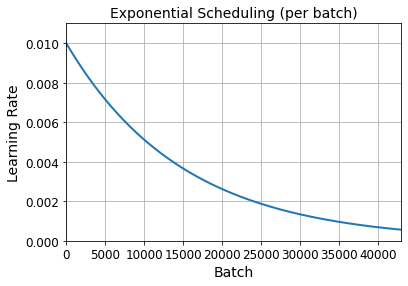

In [94]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps-1, 0, lr0*1.1])
plt.xlabel('Batch')
plt.ylabel('Learning Rate')
plt.title('Exponential Scheduling (per batch)', fontsize=14)
plt.grid(True)
plt.show()

### Piecewise Constant Scheduling

In [95]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [96]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [97]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

In [98]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

In [99]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])

In [100]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8806 - accuracy: 0.7457 - val_loss: 0.8910 - val_accuracy: 0.7766
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8435 - accuracy: 0.7553 - val_loss: 0.9314 - val_accuracy: 0.6936
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.9817 - accuracy: 0.6954 - val_loss: 1.4423 - val_accuracy: 0.5384
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 1.1619 - accuracy: 0.6005 - val_loss: 1.1288 - val_accuracy: 0.6166
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 1.2428 - accuracy: 0.5978 - val_loss: 1.2385 - val_accuracy: 0.5886
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8965 - accuracy: 0.6495 - val_loss: 0.8578 - val_accuracy: 0.6724
Epoch 7/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8501 - accuracy: 0.6625 - val_loss: 0.8656 - val_accuracy:

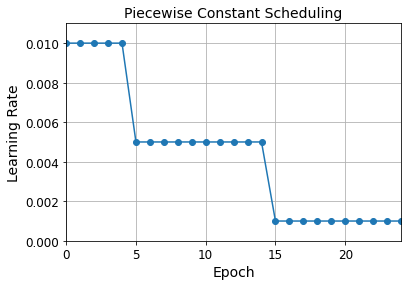

In [101]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], 'o-')
plt.axis([0, n_epochs-1, 0, 0.011])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Piecewise Constant Scheduling', fontsize=14)
plt.grid(True)
plt.show()

### Performance Scheduling

In [102]:
tf.random.set_seed(42)
np.random.seed(42)

In [103]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

In [104]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

In [105]:
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

In [106]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5929 - accuracy: 0.8069 - val_loss: 0.4496 - val_accuracy: 0.8552
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5021 - accuracy: 0.8389 - val_loss: 0.5988 - val_accuracy: 0.8394
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5155 - accuracy: 0.8399 - val_loss: 0.8146 - val_accuracy: 0.8026
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5277 - accuracy: 0.8450 - val_loss: 0.5183 - val_accuracy: 0.8470
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5183 - accuracy: 0.8488 - val_loss: 0.5701 - val_accuracy: 0.8342
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5183 - accuracy: 0.8511 - val_loss: 0.6330 - val_accuracy: 0.8490
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3110 - accuracy: 0.8919 - val_loss: 0.3888 - val_accuracy:

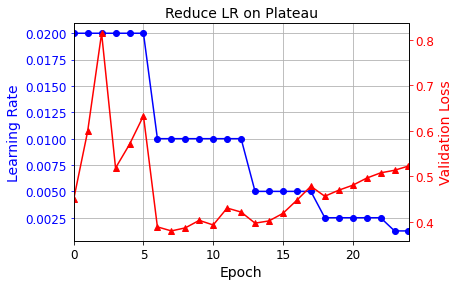

In [107]:
plt.plot(history.epoch, history.history['lr'], 'bo-')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate', color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs-1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history['val_loss'], 'r^-')
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title('Reduce LR on Plateau', fontsize=14)
plt.show()

### tf.keras Schedulers

In [108]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])

In [109]:
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

In [110]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4893 - accuracy: 0.8276 - val_loss: 0.4094 - val_accuracy: 0.8600
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3819 - accuracy: 0.8650 - val_loss: 0.3742 - val_accuracy: 0.8702
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3487 - accuracy: 0.8767 - val_loss: 0.3731 - val_accuracy: 0.8694
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3264 - accuracy: 0.8837 - val_loss: 0.3497 - val_accuracy: 0.8810
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3104 - accuracy: 0.8897 - val_loss: 0.3433 - val_accuracy: 0.8794
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2958 - accuracy: 0.8951 - val_loss: 0.3418 - val_accuracy: 0.8810
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2854 - accuracy: 0.8988 - val_loss: 0.3358 - val_accuracy:

구간별 Constant Scheduling

In [111]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5 * n_steps_per_epoch, 15 * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

### 1Cycle Scheduling

In [112]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [113]:
tf.random.set_seed(42)
np.random.seed(42)

In [114]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

In [115]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.3860


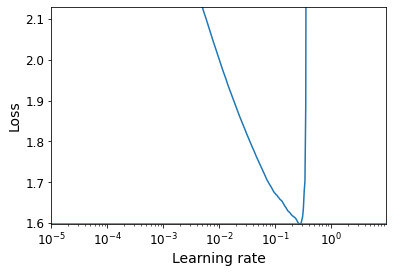

In [116]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [117]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [118]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 2s 5ms/step - loss: 0.6572 - accuracy: 0.7739 - val_loss: 0.4872 - val_accuracy: 0.8338
Epoch 2/25
430/430 [==============================] - 2s 4ms/step - loss: 0.4581 - accuracy: 0.8396 - val_loss: 0.4275 - val_accuracy: 0.8520
Epoch 3/25
430/430 [==============================] - 2s 5ms/step - loss: 0.4122 - accuracy: 0.8546 - val_loss: 0.4117 - val_accuracy: 0.8590
Epoch 4/25
430/430 [==============================] - 2s 4ms/step - loss: 0.3837 - accuracy: 0.8643 - val_loss: 0.3868 - val_accuracy: 0.8686
Epoch 5/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3640 - accuracy: 0.8719 - val_loss: 0.3768 - val_accuracy: 0.8678
Epoch 6/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3457 - accuracy: 0.8770 - val_loss: 0.3745 - val_accuracy: 0.8708
Epoch 7/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3330 - accuracy: 0.8808 - val_loss: 0.3634 - val_accuracy: 0.8702
Epoch 

# Avoiding Overfitting Through Regularization

## $\ell_1$ and $\ell_2$ regularization

In [119]:
layer = keras.layers.Dense(100, activation='elu',
                          kernel_initializer='he_normal',
                          kernel_regularizer=keras.regularizers.l2(0.01))

In [120]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='elu',
                      kernel_initializer='he_normal',
                      kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation='elu',
                      kernel_initializer='he_normal',
                      kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation='softmax',
                      kernel_regularizer=keras.regularizers.l2(0.01))
])

In [121]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

In [122]:
n_epochs = 2
histroy = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 8s 4ms/step - loss: 1.5956 - accuracy: 0.8124 - val_loss: 0.7169 - val_accuracy: 0.8340
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7197 - accuracy: 0.8274 - val_loss: 0.6850 - val_accuracy: 0.8376


In [123]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                          activation='elu',
                          kernel_initializer='he_normal',
                          kernel_regularizer=keras.regularizers.l2(0.01))

In [124]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation='softmax')
])

In [125]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])

In [126]:
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 4ms/step - loss: 1.6313 - accuracy: 0.8113 - val_loss: 0.7218 - val_accuracy: 0.8310
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7187 - accuracy: 0.8273 - val_loss: 0.6826 - val_accuracy: 0.8382


## Dropout

In [127]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [128]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])

In [129]:
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5838 - accuracy: 0.7997 - val_loss: 0.3730 - val_accuracy: 0.8644
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4209 - accuracy: 0.8443 - val_loss: 0.3397 - val_accuracy: 0.8718


## Alpha Dropout

In [130]:
tf.random.set_seed(42)
np.random.seed(42)

In [131]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(0.2),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.AlphaDropout(0.2),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.AlphaDropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [132]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [133]:
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6654 - accuracy: 0.7595 - val_loss: 0.5929 - val_accuracy: 0.8408
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5604 - accuracy: 0.7934 - val_loss: 0.5602 - val_accuracy: 0.8400
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5285 - accuracy: 0.8048 - val_loss: 0.4841 - val_accuracy: 0.8580
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5070 - accuracy: 0.8125 - val_loss: 0.4647 - val_accuracy: 0.8582
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4918 - accuracy: 0.8180 - val_loss: 0.4695 - val_accuracy: 0.8562
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4867 - accuracy: 0.8181 - val_loss: 0.4710 - val_accuracy: 0.8596
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4722 - accuracy: 0.8250 - val_loss: 0.4694 - val_accuracy:

In [134]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4438 - accuracy: 0.8687


[0.44377344846725464, 0.8687000274658203]

In [135]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 2s 1ms/step - loss: 0.3296 - accuracy: 0.8890


[0.32961320877075195, 0.889018177986145]

In [136]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - ETA: 0s - loss: 0.4171 - accuracy: 0.84 - 6s 4ms/step - loss: 0.4172 - accuracy: 0.8460


## MC Dropout

In [137]:
tf.random.set_seed(42)
np.random.seed(42)

In [138]:
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_proba.std(axis=0)

In [139]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [140]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.28, 0.  , 0.57]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.87, 0.  , 0.13]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.  , 0.  , 0.74]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.24, 0.  , 0.74]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.08, 0.  , 0.87]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.31, 0.  , 0.69]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.3 , 0.  , 0.09, 0.  , 0.61]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.36, 0.  , 0.64]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.62, 0.  , 0.03, 0.  , 0.35]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.03, 0.  , 0.93]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.41, 0.  , 0.  , 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.11, 0.  , 0.39]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.27, 0.  , 0.03, 0.  , 0

In [141]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.09, 0.  , 0.74]],
      dtype=float32)

In [142]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.24, 0.  , 0.15, 0.  , 0.27]],
      dtype=float32)

In [143]:
y_pred = np.argmax(y_proba, axis=1)

In [144]:
accuracy = np.sum(y_pred==y_test) / len(y_test)
accuracy

0.8677

In [145]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)
    
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [146]:
tf.random.set_seed(42)
np.random.seed(42)

In [147]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer for layer in model.layers
])

In [148]:
mc_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_263 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_264 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_265 (Dense)            (None, 10)              

In [149]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [150]:
mc_model.set_weights(model.get_weights())

In [151]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.15, 0.  , 0.66]],
      dtype=float32)

## Max norm

In [152]:
layer = keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal',
                          kernel_constraint=keras.constraints.max_norm(1.))

In [153]:
MaxNormDense = partial(keras.layers.Dense,
                      activation='selu', kernel_initializer='lecun_normal',
                      kernel_constraint=keras.constraints.max_norm())

In [154]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation='softmax')
])

In [155]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

In [156]:
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                   validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4735 - accuracy: 0.8350 - val_loss: 0.3700 - val_accuracy: 0.8632
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3446 - accuracy: 0.8753 - val_loss: 0.3556 - val_accuracy: 0.8738
